## Importing relevant libraries

In [ ]:
#All necessary imports for the task to begin with - will be added to over time as we need more libraries/functions 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD

## Reading the data

In [3]:
houseData = pd.read_csv("kc_house_data.csv")
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory data analysis

In [4]:
#sum of null values in each column - checks for nulls
houseData.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
houseData.drop(['zipcode','date','id'],axis=1,inplace = True) # reasons mentioned in report

In [6]:
X=houseData.drop(["price"],axis=1).values
y=houseData["price"].values
houseData.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state =2)

In [8]:
# scaling the features using random scaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

# Extensive Search

## Number of epochs and batch size

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
def model(batch_size,learning_rate,optimizer):
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) #input layer
  for i in range(4):
    model.add(Dense(units=82,activation='relu'))
  model.add(Dense(1))
  model.compile(
      optimizer= optimizer(learning_rate),
      loss='mae')
  return model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size=batch_size)

In [18]:
history16 = model(16,0.01, Adam)

Epoch 1/100
865/865 [==============================] - 3s 3ms/step - loss: 139951.2031 - val_loss: 120679.9844
Epoch 2/100
865/865 [==============================] - 2s 3ms/step - loss: 112845.5391 - val_loss: 123502.1250
Epoch 3/100
865/865 [==============================] - 2s 3ms/step - loss: 110280.0391 - val_loss: 122045.3281
Epoch 4/100
865/865 [==============================] - 2s 3ms/step - loss: 109676.4922 - val_loss: 141894.6406
Epoch 5/100
865/865 [==============================] - 2s 3ms/step - loss: 109057.4688 - val_loss: 105377.0547
Epoch 6/100
865/865 [==============================] - 2s 3ms/step - loss: 109136.2656 - val_loss: 111331.8750
Epoch 7/100
865/865 [==============================] - 3s 4ms/step - loss: 107527.7734 - val_loss: 104769.1016
Epoch 8/100
865/865 [==============================] - 2s 3ms/step - loss: 105873.9062 - val_loss: 102266.0859
Epoch 9/100
865/865 [==============================] - 2s 3ms/step - loss: 99000.8281 - val_loss: 93895.7891
Epo

In [19]:
history32 = model(32,0.01, Adam)

Epoch 1/100
433/433 [==============================] - 2s 4ms/step - loss: 159098.2031 - val_loss: 112996.2109
Epoch 2/100
433/433 [==============================] - 1s 3ms/step - loss: 113133.1250 - val_loss: 108613.4297
Epoch 3/100
433/433 [==============================] - 2s 3ms/step - loss: 109603.1406 - val_loss: 104942.7344
Epoch 4/100
433/433 [==============================] - 1s 3ms/step - loss: 107547.4766 - val_loss: 104208.7578
Epoch 5/100
433/433 [==============================] - 2s 4ms/step - loss: 107177.6406 - val_loss: 109611.8906
Epoch 6/100
433/433 [==============================] - 1s 3ms/step - loss: 106961.0156 - val_loss: 106184.0312
Epoch 7/100
433/433 [==============================] - 2s 4ms/step - loss: 105336.2578 - val_loss: 101960.0156
Epoch 8/100
433/433 [==============================] - 1s 3ms/step - loss: 104756.8359 - val_loss: 102859.3984
Epoch 9/100
433/433 [==============================] - 1s 3ms/step - loss: 106047.9453 - val_loss: 104703.6484
E

In [20]:
history64 = model(64,0.01, Adam)

Epoch 1/100
217/217 [==============================] - 2s 4ms/step - loss: 184254.7188 - val_loss: 115274.6328
Epoch 2/100
217/217 [==============================] - 1s 4ms/step - loss: 110609.3984 - val_loss: 116722.7578
Epoch 3/100
217/217 [==============================] - 1s 3ms/step - loss: 110938.7031 - val_loss: 119369.7109
Epoch 4/100
217/217 [==============================] - 1s 3ms/step - loss: 108143.2031 - val_loss: 121063.0547
Epoch 5/100
217/217 [==============================] - 1s 3ms/step - loss: 107393.0703 - val_loss: 105732.4062
Epoch 6/100
217/217 [==============================] - 1s 4ms/step - loss: 106369.4844 - val_loss: 105257.3203
Epoch 7/100
217/217 [==============================] - 1s 4ms/step - loss: 104673.3594 - val_loss: 108124.6406
Epoch 8/100
217/217 [==============================] - 1s 3ms/step - loss: 104422.6719 - val_loss: 102713.6328
Epoch 9/100
217/217 [==============================] - 1s 4ms/step - loss: 103639.3125 - val_loss: 102653.3438
E

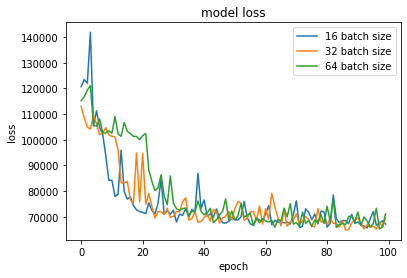

In [21]:
#comparing different batch sizes and epochs
plt.plot(history16.history['val_loss'])
plt.plot(history32.history['val_loss'])
plt.plot(history64.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['16 batch size','32 batch size', '64 batch size'])
plt.show()

## Tuning number of hidden layers and nodes



In [ ]:
from tensorflow import keras
import keras_tuner as kt
from datetime import datetime
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Define the Keras TensorBoard callback.
logdir="logs/fits(1)/" + datetime.now().strftime("%Y%m%d-%H%M%S") # log directory for tensorboard
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

def build_model(hp):
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) #input layer
  n_hidden = hp.Int('hidden_layers',min_value = 1,max_value = 5) # number of hidden layers
  hp_units = hp.Int('units', min_value=10, max_value=100) # number of neurons in hidden layers
  for i in range(n_hidden):
    model.add(Dense(units=hp_units,activation='relu')) # default activation function
  model.add(Dense(1)) #output layer
  model.compile(
      optimizer= Adam(0.01), # default optimizer and learning rate
      loss='mae',
      metrics=['mae']
  )

  return model

# Random algorithm from keras tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=7,
    directory='keras_tuner_hidden_layer_paramtest(1)', 
    project_name='keras_tuner_demo')
tuner.search(X_train, y_train, epochs=75, validation_split=0.2, batch_size = 32, callbacks=[tensorboard_callback])

Trial 7 Complete [00h 03m 22s]
val_loss: 71428.3125

Best val_loss So Far: 65874.4765625
Total elapsed time: 00h 20m 28s
INFO:tensorflow:Oracle triggered exit


In [ ]:
%load_ext tensorboard # tensor board to visualise result
%tensorboard --logdir logs/fits(1) # matching directory to the log tensorboard above

## Tuning activation function

In [ ]:
from tensorflow import keras
import keras_tuner as kt
from datetime import datetime
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Define the Keras TensorBoard callback.
logdir="logs/fits(2)/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

def build_model(hp):
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) #input layer
  hp_activation = hp.Choice('activation',values =['relu','ELU','selu','LeakyReLU'])
  for i in range(4):
    model.add(Dense(units=82,activation=hp_activation)) #fixed hidden layers
  model.add(Dense(1))
  model.compile(
      optimizer= Adam(0.01), # fixed optimizer and learning rate
      loss='mae',
      metrics=['mae']
  )

  return model

# Random Search algorithm from keras tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=8,
    directory='keras_tuner_hidden_layer_paramtest(2)',
    project_name='keras_tuner_demo')
tuner.search(X_train, y_train, epochs=75, validation_split=0.2, batch_size = 32, callbacks=[tensorboard_callback])

Trial 4 Complete [00h 02m 28s]
val_loss: 66480.890625

Best val_loss So Far: 66480.890625
Total elapsed time: 00h 09m 54s
INFO:tensorflow:Oracle triggered exit


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fits(2)

## Tuning Optimizer

In [ ]:
from tensorflow import keras
import keras_tuner as kt
from datetime import datetime
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Define the Keras TensorBoard callback.
logdir="logs/fits(3)/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

def build_model(hp):
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) #input layer
  for i in range(4):
    model.add(Dense(units=88,activation='ELU'))
  model.add(Dense(1))
  model.compile(
      optimizer= hp.Choice('optimizer', values=['Adam', 'Nadam', 'SGD', 'RMSProp']),
      loss='mae',
      metrics=['mae']
  )

  return model

# Random Search algorithm from keras tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=8,
    directory='keras_tuner_hidden_layer_paramtest(3)',
    project_name='keras_tuner_demo')

tuner.search(X_train, y_train, epochs=75, validation_split=0.2, batch_size = 32, callbacks=[tensorboard_callback])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fits(3)

## Tuning learning rate

In [ ]:
from tensorflow import keras
import keras_tuner as kt
from datetime import datetime
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Define the Keras TensorBoard callback.
logdir="logs/fits(4)/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

def build_model(hp):
  model = tf.keras.Sequential()
  
  model.add(Dense(units = 17)) #input layer
  for i in range(4):
    model.add(Dense(units=88,activation='ELU'))
  model.add(Dense(1))
  # Choose an optimal value from 0.1, 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[0.1,0.01, 0.001, 0.0001])
  model.compile(
      optimizer= Nadam(learning_rate = hp_learning_rate),
      loss='mae',
      metrics=['mae']
  )

  return model

# Random Search algorithm from keras tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=8,
    directory='keras_tuner_hidden_layer_paramtest(4)',
    project_name='keras_tuner_demo')

tuner.search(X_train, y_train, epochs=75, validation_split=0.2, batch_size = 32, callbacks=[tensorboard_callback])

Trial 4 Complete [00h 03m 43s]
val_loss: 70277.4609375

Best val_loss So Far: 65458.52734375
Total elapsed time: 00h 16m 54s
INFO:tensorflow:Oracle triggered exit


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fits(4)

# Grid search and cross validation of activation functipon, optimizer and learning rate 

In [11]:

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
# Function to create model, required for KerasClassifier
def create_model(optimizer='Adam', learning_rate = '0.01', activation ='relu'):
	# create model
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) # input layer
  for i in range(4):
    model.add(Dense(units=82,activation=activation))
  model.add(Dense(1))
  model.compile(
      optimizer= optimizer(learning_rate),
      loss='mae')
  return model

model = KerasRegressor(build_fn = create_model, epochs=75, batch_size=32)
# define the grid search parameters
param_grid = {'optimizer':[Adam,Nadam], 'learning_rate': [0.1,0.01], 'activation': ['relu','selu']}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring = 'neg_mean_absolute_error')
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/75
361/361 [==============================] - 4s 6ms/step - loss: 150633.5781
Epoch 2/75
361/361 [==============================] - 2s 6ms/step - loss: 125870.0781
Epoch 3/75
361/361 [==============================] - 2s 5ms/step - loss: 121246.5469
Epoch 4/75
361/361 [==============================] - 1s 3ms/step - loss: 116213.4062
Epoch 5/75
361/361 [==============================] - 1s 2ms/step - loss: 114215.2109
Epoch 6/75
361/361 [==============================] - 1s 2ms/step - loss: 111345.4531
Epoch 7/75
361/361 [==============================] - 1s 2ms/step - loss: 112464.6250
Epoch 8/75
361/361 [==============================] - 1s 2ms/step - loss: 114432.8203
Epoch 9/75
361/361 [==============================] - 1s 2ms/step - loss: 108968.6562
Epoch 10/75
361/361 [==============================] - 2s 4ms/step - loss: 110372.3516
Epoch 11/75
361/361 [==============================] - 2s 5ms/step - loss: 110077.2656
Epoch 12/75
361/361 [==============================]

[{'activation': 'relu', 'learning_rate': 0.1, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}, {'activation': 'relu', 'learning_rate': 0.1, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}, {'activation': 'relu', 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}, {'activation': 'relu', 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}, {'activation': 'selu', 'learning_rate': 0.1, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}, {'activation': 'selu', 'learning_rate': 0.1, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}, {'activation': 'selu', 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}, {'activation': 'selu', 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}]


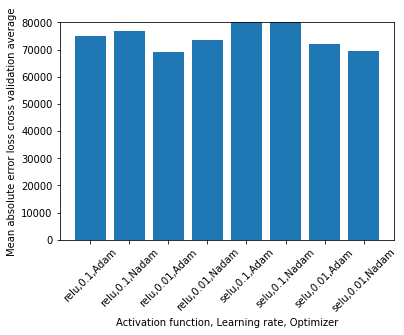

In [39]:
#grid_result.cv_results_['params']
grid_result.cv_results_['mean_test_score']
x = ['relu,0.1,Adam','relu,0.1,Nadam','relu,0.01,Adam','relu,0.01,Nadam','selu,0.1,Adam','selu,0.1,Nadam','selu,0.01,Adam','selu,0.01,Nadam']
plt.bar(x ,abs(grid_result.cv_results_['mean_test_score'], ))
plt.ylim(0,80000)
plt.xticks(rotation=45)
plt.xlabel("Activation function, Learning rate, Optimizer")
plt.ylabel("Mean absolute error loss cross validation average")
print(grid_result.cv_results_['params'])

## Best three networks visualised

In [42]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasRegressor
#from keras.wrappers.scikit_learn import KerasRegressor
# Function to create model, required for KerasClassifier
def create_model():
	# create model
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) # input layer
  for i in range(4):
    model.add(Dense(units=82,activation='relu'))
  model.add(Dense(1))
  model.compile(
      optimizer= Adam(0.01),
      loss='mae')
  return model.fit(X_test, y_test, epochs=75, batch_size=32)
history1 = create_model()

Epoch 1/75
136/136 [==============================] - 1s 3ms/step - loss: 254464.7031
Epoch 2/75
136/136 [==============================] - 0s 3ms/step - loss: 116823.0625
Epoch 3/75
136/136 [==============================] - 0s 3ms/step - loss: 120819.3125
Epoch 4/75
136/136 [==============================] - 0s 3ms/step - loss: 111578.8203
Epoch 5/75
136/136 [==============================] - 0s 3ms/step - loss: 113398.7188
Epoch 6/75
136/136 [==============================] - 0s 3ms/step - loss: 111229.9531
Epoch 7/75
136/136 [==============================] - 0s 2ms/step - loss: 112970.4219
Epoch 8/75
136/136 [==============================] - 0s 3ms/step - loss: 110162.5938
Epoch 9/75
136/136 [==============================] - 0s 3ms/step - loss: 110541.5078
Epoch 10/75
136/136 [==============================] - 0s 3ms/step - loss: 109513.1172
Epoch 11/75
136/136 [==============================] - 0s 3ms/step - loss: 107817.2031
Epoch 12/75
136/136 [==============================]

In [43]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasRegressor
#from keras.wrappers.scikit_learn import KerasRegressor
# Function to create model, required for KerasClassifier
def create_model():
	# create model
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) # input layer
  for i in range(4):
    model.add(Dense(units=82,activation='selu'))
  model.add(Dense(1))
  model.compile(
      optimizer= Adam(0.01),
      loss='mae')
  return model.fit(X_test, y_test, epochs=75, batch_size=32)
history2 = create_model()

Epoch 1/75
136/136 [==============================] - 1s 3ms/step - loss: 278986.6562
Epoch 2/75
136/136 [==============================] - 0s 3ms/step - loss: 145317.2812
Epoch 3/75
136/136 [==============================] - 0s 3ms/step - loss: 144788.8906
Epoch 4/75
136/136 [==============================] - 0s 3ms/step - loss: 138912.5938
Epoch 5/75
136/136 [==============================] - 0s 3ms/step - loss: 133520.5156
Epoch 6/75
136/136 [==============================] - 0s 2ms/step - loss: 127759.7969
Epoch 7/75
136/136 [==============================] - 0s 3ms/step - loss: 128429.5703
Epoch 8/75
136/136 [==============================] - 0s 3ms/step - loss: 124521.2031
Epoch 9/75
136/136 [==============================] - 0s 3ms/step - loss: 122370.5469
Epoch 10/75
136/136 [==============================] - 0s 3ms/step - loss: 121994.6953
Epoch 11/75
136/136 [==============================] - 0s 3ms/step - loss: 119865.0938
Epoch 12/75
136/136 [==============================]

In [44]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasRegressor
#from keras.wrappers.scikit_learn import KerasRegressor
# Function to create model, required for KerasClassifier
def create_model():
	# create model
  model = tf.keras.Sequential()
  model.add(Dense(units = 17)) # input layer
  for i in range(4):
    model.add(Dense(units=82,activation='selu'))
  model.add(Dense(1))
  model.compile(
      optimizer= Nadam(0.01),
      loss='mae')
  return model.fit(X_test, y_test, epochs=75, batch_size=32)
history3 = create_model()

Epoch 1/75
136/136 [==============================] - 2s 3ms/step - loss: 221769.8906
Epoch 2/75
136/136 [==============================] - 0s 2ms/step - loss: 124754.6094
Epoch 3/75
136/136 [==============================] - 0s 3ms/step - loss: 117937.1797
Epoch 4/75
136/136 [==============================] - 0s 3ms/step - loss: 108524.1797
Epoch 5/75
136/136 [==============================] - 0s 3ms/step - loss: 105651.3750
Epoch 6/75
136/136 [==============================] - 0s 3ms/step - loss: 103319.8281
Epoch 7/75
136/136 [==============================] - 0s 2ms/step - loss: 101551.2500
Epoch 8/75
136/136 [==============================] - 0s 3ms/step - loss: 100599.7266
Epoch 9/75
136/136 [==============================] - 0s 3ms/step - loss: 99901.7734
Epoch 10/75
136/136 [==============================] - 0s 2ms/step - loss: 98484.0859
Epoch 11/75
136/136 [==============================] - 0s 2ms/step - loss: 97242.5859
Epoch 12/75
136/136 [==============================] - 

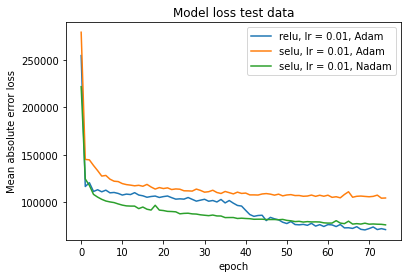

In [46]:
# best three network loss plot
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('Model loss test data')
plt.ylabel('Mean absolute error loss')
plt.xlabel('epoch')
plt.legend(['relu, lr = 0.01, Adam','selu, lr = 0.01, Adam', 'selu, lr = 0.01, Nadam'])
plt.show()